# Simple Linear Regression

In this notebook, we'll build a linear regression model

# Regression Model Building Steps
* Reading and Understanding the Data
* EDA
    * Missing Value Treatment
    * Outlier Treatment
    * Univariate Analysis
        * Descriptive Statistics
            * Mean/Median/Mode/Skewness
            * Transformations
    * Multivariate Analysis
        * Correlations
        * Box Plots
        * Chi-square Test to understand the relationship between two categorical variables
* Encoding 
    * Target Variable Encoding - for Y variable
    * Dummy variable Encoding - for X variables
* Scaling - for numerical variables
* Feature Selection 
    * RFE
* Base Model Building - First Model building in python
* Regression Model Assumptions - Validation
* Final Model Building
* Results Interpretation
* Submission

# Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

In [43]:
# Read the given CSV file, and view some sample records
Housing = pd.read_csv("Housing.csv")
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Let's inspect the various aspects of our dataframe

In [46]:
Housing['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [47]:
Housing['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [44]:
Housing.shape

(545, 13)

In [45]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Step 2: Exploratory Data Analysis - EDA

In [6]:
Housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values

## Step 1 - Check for Duplicate records

In [48]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
# Check for duplicate data
dups = Housing.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Housing[dups]

Number of duplicate rows = 0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


We can clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute, it should be same as before

**If we had duplicate values then we would remove them from the dataset**

# Step-2 Missing Value Treatment

In [50]:
Housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Numerical Variable missing value treatement

In [52]:
# meadian_price = Housing["price"].median()
# # Housing["price"].mean()

# Housing["price"].replace(np.nan,
#                          meadian_price,
#                          inplace=True)

4340000.0
4766729.247706422


In [9]:
# median1 = Housing["price"].median()
# median2=df["TRAVEL TIME"].median()
# median3=df["MILES CLOCKED"].median()
# median4=df["CAR AGE"].median()

# df["INCOME"].replace(np.nan,median1,inplace=True)
# df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
# df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
# df["CAR AGE"].replace(np.nan,median4,inplace=True)

### Categorical Variable missing value treatement

In [10]:
# mode1=df["SEX"].mode().values[0]
# mode2=df["MARITAL STATUS"].mode().values[0]
# mode3=df["EDUCATION"].mode().values[0]
# mode4=df["JOB"].mode().values[0]
# mode5=df["USE"].mode().values[0]
# mode6=df['CITY'].mode().values[0]
# mode7=df["CAR TYPE"].mode().values[0]
# mode8=df["POSTAL CODE"].mode().values[0]


# df["SEX"]=df["SEX"].replace(np.nan,mode1)
# df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
# df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
# df["JOB"]=df["JOB"].replace(np.nan,mode4)
# df["USE"]=df["USE"].replace(np.nan,mode5)
# df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
# df['CITY']=df['CITY'].replace(np.nan,mode6)
# df['POSTAL CODE']=df['POSTAL CODE'].replace(np.nan,mode8)

**Replace your columns above if you have any missing values in the data**

### General Function to treat missing values

In [12]:
def missing_col(df):
    for i in df.columns:
        if df[i].dtype == 'float64' :
            df[i].fillna(value = df[i].mean(),inplace = True)
        else:
            df[i].fillna(value = 'fixed_value',inplace = True)
            df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    return df

# numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

# Step 3 - Outliers Detection
To check for outliers, we will be plotting the box plots of all X variables

In [54]:
Housing.bedrooms.value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

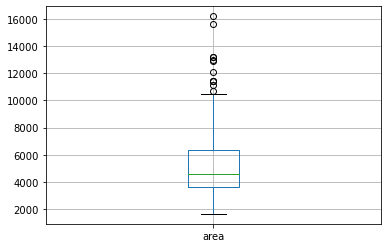

In [9]:
Housing.boxplot(column=['area'])
plt.show();

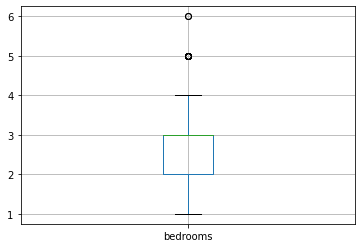

In [10]:
Housing.boxplot(column=['bedrooms'])
plt.show();

Though bedrooms is a integer variable but technically it is discrete/categorical data so treating outliers won't make much sense

In [11]:
print("No. of Unique Categories-", Housing['bedrooms'].nunique(),"\nUnique Categories-",Housing['bedrooms'].unique())

No. of Unique Categories- 6 
Unique Categories- [4 3 5 2 6 1]


**Similar Analysis to be performed for variables like - bathrooms,stories,mainroad,basement and parking**

## Outlier Treatment

### IQR Technique

In [55]:
def treat_outlier(col):
    q1,q3 = col.quantile([0.25,0.75])
    print("First Quartlie- ", q1)
    print("Third Quartlie- ", q3)
    IQR = q3-q1
    print(IQR)
    lower_range = q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    print(upper_range)
    return lower_range, upper_range

In [56]:
lower_range,upper_range=treat_outlier(Housing['area'])
Housing['area'] = np.where(Housing['area']>upper_range,upper_range,Housing['area'])
Housing['area'] = np.where(Housing['area']<lower_range,lower_range,Housing['area'])

First Quartlie-  3600.0
Third Quartlie-  6360.0
2760.0
10500.0


In [15]:
Housing['area'].describe()

count      545.000000
mean      5102.249541
std       2005.804353
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      10500.000000
Name: area, dtype: float64

Compare the values from earlier area values

#### Get the Z-score table
Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 3 standard deviation

In [27]:
# from scipy import stats

In [28]:
# z=np.abs(stats.zscore(Housing.area))

In [29]:
# #Identifying the z scores which are > 3 (threshold value)
# print(np.where(z > 3))

(array([], dtype=int64),)


In [ ]:
# threshold = 3
# outlier = [] 
# for i in Housing['area']: 
#     z = (i-mean)/std 
#     if z > threshold: 
#         outlier.append(i) 
# print('outlier in dataset is', outlier) 

Now no outliers are shown since we have aleardy treated the data above

**When we know our distribution is normal for a variable then z-score method can be used else IQR to be used**

# Univariate Analysis
Analysis of a single variable

## Numerical Variables

In [12]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [57]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
num_col = Housing.select_dtypes(include = np.number).columns.tolist()[:-1]
print(num_col)

['price', 'area', 'bedrooms', 'bathrooms', 'stories']


<AxesSubplot:xlabel='price', ylabel='Density'>

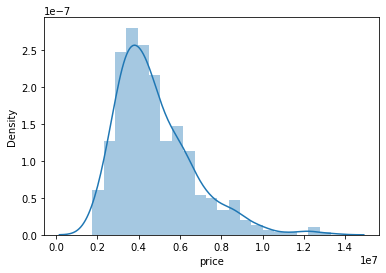

In [15]:
# histogram of income
sns.distplot(Housing['price'])

From above figure, we can say that the price is right skewed but not highly skewed so no need to transform the price variable

***We will fit our model and then examine residual plots. If the residual plots look good, fear not and carry on. If the residual plots do not look good, we may need to transform your outcome variable (log in terms of +ve/right skewed).***

<AxesSubplot:xlabel='area', ylabel='Density'>

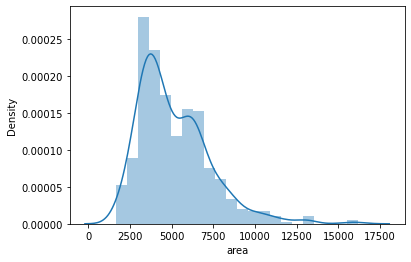

In [16]:
# histogram of income
sns.distplot(Housing['area'])

From above figure, we can say that the area is right skewed but not a high skew

**If a variable is right skewed so to treat the skewness we take log of the variable** -

In [17]:
# Housing['log_area'] = np.log(Housing['area'])

In [18]:
# sns.distplot(Housing['log_area'])

**Similar Analysis can be performed for other numerical variables**

## Bi-variate Analysis

In [27]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
Housing[['price','area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


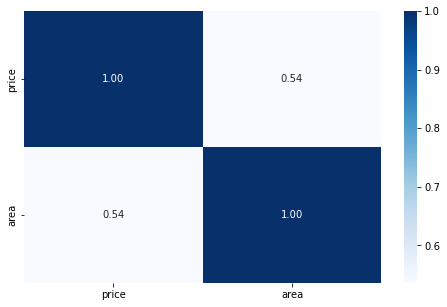

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(Housing[['price','area']].corr(),
            annot=True, 
            fmt='.2f',
            cmap='Blues')
plt.show();

54% +ve correlation between log_area and price indicates that as area increases price also increases

<AxesSubplot:xlabel='area', ylabel='price'>

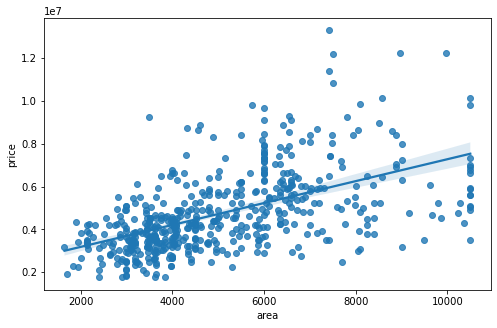

In [59]:
fig = plt.figure(figsize=(8,5))
# sns.scatterplot(Housing['price'],Housing['area'])

# draw regplot
sns.regplot(x = "area",
            y = "price",
            data = Housing)
# fig.suptitle('y_test vs ypred', fontsize=20)              # Plot heading 
# plt.xlabel('y_test', fontsize=18)                          # X-label
# plt.ylabel('ypred', fontsize=16)     

## Categorical Variables

In [33]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
cat_col = Housing.select_dtypes(include=np.object).columns.tolist()[:-1]
print(cat_col)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [40]:
cat_col.append('bedrooms')
cat_col.append('bathrooms')
cat_col.append('parking')
cat_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'bedrooms',
 'bathrooms']

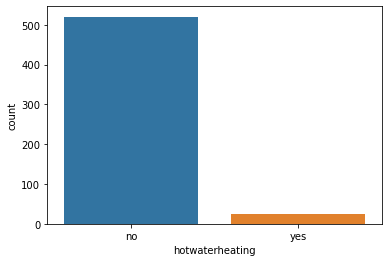

In [20]:
sns.countplot(Housing["hotwaterheating"]);  # countplot for hotwaterheating

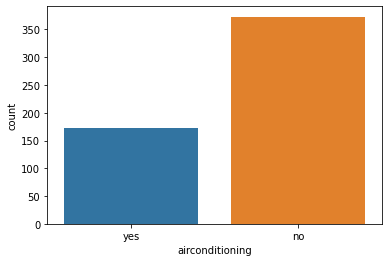

In [21]:
sns.countplot(Housing["airconditioning"]);  # countplot for airconditioning

In [58]:
Housing["airconditioning"].value_counts()  # countplot for hotwaterheating

no     373
yes    172
Name: airconditioning, dtype: int64

**Similar Analysis can be performed for other categorical variables**

## Bi-Variate Analysis

### With X variables

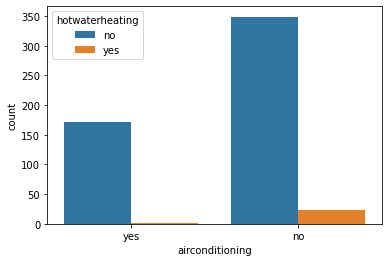

In [32]:
sns.countplot(Housing["airconditioning"],
              hue = Housing["hotwaterheating"] );  # countplot for airconditioning and hotwaterheating

### With Target (Y) variable

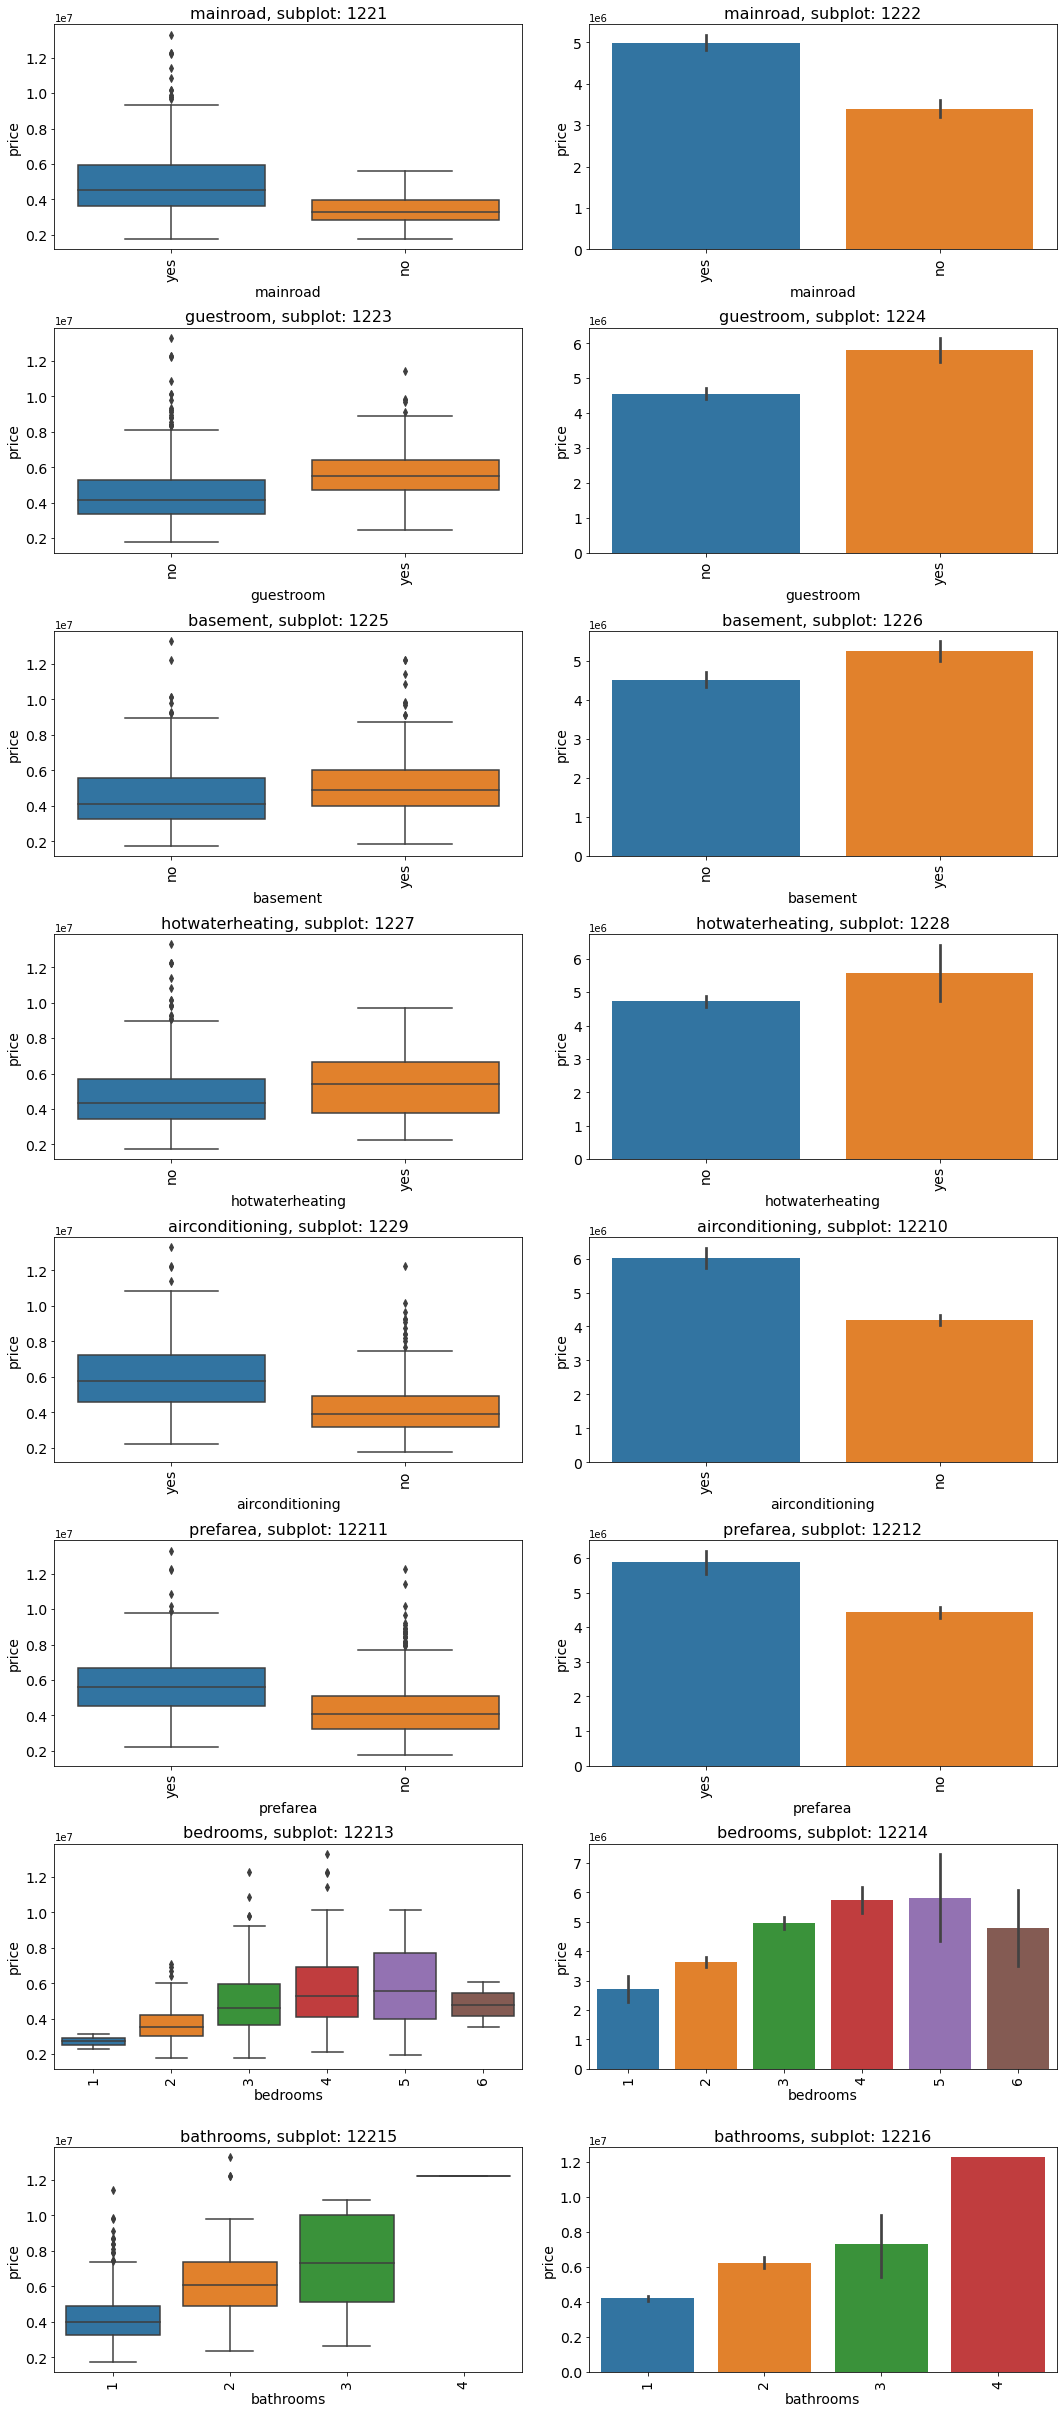

In [41]:
a = 12
b = 2
c = 1

fig = plt.figure(figsize=(30,40))
fig.set_size_inches(15, 50)

for i in cat_col:
    
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.boxplot(x = i,
                y = Housing['price'],
                data=Housing) #check the estimator 'mean' here by default
    c = c+1
    
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.barplot(x=i, y=Housing['price'],data=Housing) #check the estimator 'mean' here by default
    c = c+1

plt.tight_layout()
plt.show();

# Multivariate Analysis
Analysis of a multiple variables

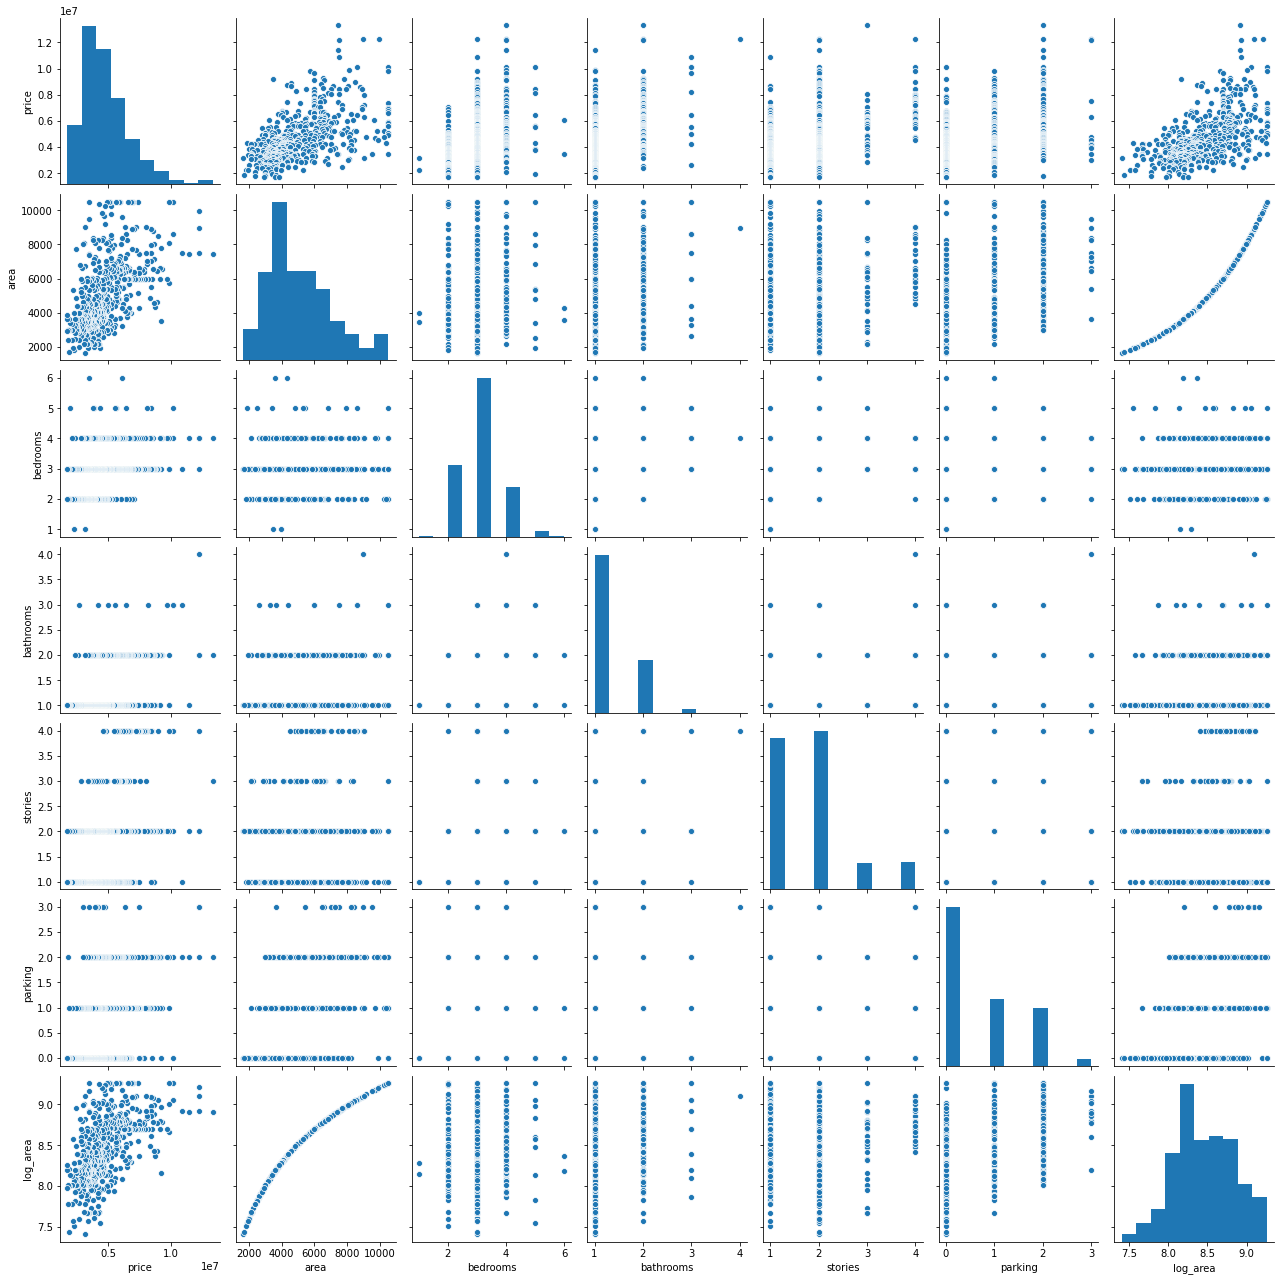

In [20]:
# Pairplot of all variables
sns.pairplot(Housing)
plt.show();

Here we have lot of categorical variables thats why pairplot is not helpful to analyze the data here so we need to find a better approach to find the relationship between categorical variables

## Relationship between Numerical Dependent Variable and Categorical Independent Variables

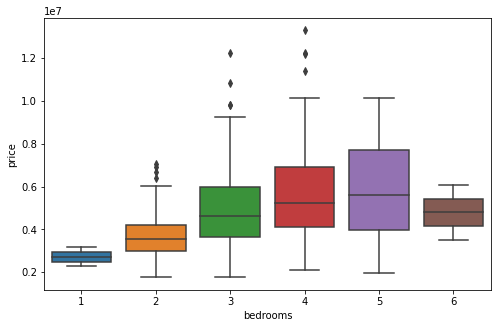

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(Housing['bedrooms'],Housing['price'])

We can clearly see, as bedroom size increases price also increases, lets check with the ANOVA test to confirm whether price is different across different bedroom size

# Step 3: Encoding

**One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.**

**This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

**get_dummies is the method which creates dummy variable for each categorical variable.**

**It is considered a good practice to set parameter `drop_first` as `True` whenever get_dummies is used. It reduces the chances of multicollinearity which will be covered in coming courses and the number of features are also less as compared to `drop_first=False`**

In [23]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  log_area          545 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 59.7+ KB


In [24]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,8.911934
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,9.100526
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9.206332
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8.922658
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8.911934


## Target Variable Encoding

In case dependent variable is categorical then we need to covert it to numerical categories - more useful in classification regression 

In [25]:
# train_data = train_data.drop(['Loan_ID'], axis=1)
# train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

## Dummy Encoding

In [26]:
dummies=pd.get_dummies(Housing[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]], columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"], prefix=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],drop_first=True)

In [27]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   mainroad_yes                     545 non-null    uint8
 1   guestroom_yes                    545 non-null    uint8
 2   basement_yes                     545 non-null    uint8
 3   hotwaterheating_yes              545 non-null    uint8
 4   airconditioning_yes              545 non-null    uint8
 5   prefarea_yes                     545 non-null    uint8
 6   furnishingstatus_semi-furnished  545 non-null    uint8
 7   furnishingstatus_unfurnished     545 non-null    uint8
dtypes: uint8(8)
memory usage: 4.4 KB


In [28]:
dummies.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0


In [29]:
columns=["area","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
# Remove two columns name is 'C' and 'D' 
Housing_1 = Housing.drop(columns, axis = 1) 
Housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      545 non-null    int64  
 1   bedrooms   545 non-null    int64  
 2   bathrooms  545 non-null    int64  
 3   stories    545 non-null    int64  
 4   parking    545 non-null    int64  
 5   log_area   545 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 25.7 KB


In [30]:
Housing_1.head()

,price,bedrooms,bathrooms,stories,parking,log_area
0,13300000,4,2,3,2,8.911934
1,12250000,4,4,4,3,9.100526
2,12250000,3,2,2,2,9.206332
3,12215000,4,2,2,3,8.922658
4,11410000,4,1,2,2,8.911934


In [31]:
Housing_1 = pd.concat([Housing_1, dummies], axis=1)

In [32]:
Housing_1.head()

,price,bedrooms,bathrooms,stories,parking,log_area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,4,2,3,2,8.911934,1,0,0,0,1,1,0,0
1,12250000,4,4,4,3,9.100526,1,0,0,0,1,0,0,0
2,12250000,3,2,2,2,9.206332,1,0,1,0,0,1,1,0
3,12215000,4,2,2,3,8.922658,1,0,1,0,1,1,0,0
4,11410000,4,1,2,2,8.911934,1,1,1,0,1,0,0,0


**In the data set, each Category in all of the categorical columns have been added as columns with values 0 and 1**
**Example: mainroad_yes, guestroom_yes, basement_yes School
**If mainroad_yes =1, then it means its a mainroad and mainroad_yes= 0 means its a not a mainroad**

In [33]:
Housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   bedrooms                         545 non-null    int64  
 2   bathrooms                        545 non-null    int64  
 3   stories                          545 non-null    int64  
 4   parking                          545 non-null    int64  
 5   log_area                         545 non-null    float64
 6   mainroad_yes                     545 non-null    uint8  
 7   guestroom_yes                    545 non-null    uint8  
 8   basement_yes                     545 non-null    uint8  
 9   hotwaterheating_yes              545 non-null    uint8  
 10  airconditioning_yes              545 non-null    uint8  
 11  prefarea_yes                     545 non-null    uint8  
 12  furnishingstatus_semi-

# sklearn OneHotEncoder Method

In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [100]:
# creating instance of one-hot-encoder
# enc = OneHotEncoder(drop='first')
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(Housing[['furnishingstatus']]).toarray())

In [102]:
enc_df.head()

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
#rename the columns and then join with the main df - By default one hot encoder does not prefix the variable

In [ ]:
# merge with main df bridge_df on key values
# df = df.join(enc_df)
# df
Housing_OHE = Housing.drop(Housing['furnishingstatus'], axis = 1) 
Housing_OHE = pd.concat([Housing_OHE, enc_df], axis=1)

# sklearn Label Encoding Method

In [85]:
df['EDUCATION'].value_counts()

High School    191
Bachelors       54
Masters         38
PhD              6
Name: EDUCATION, dtype: int64

## Categorical Coding Approach
Using category codes approach: This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ type. So you might have to change type to ‘category’ before using this approach.

In [93]:
# converting type of columns to 'category'
df['POSTAL CODE'] = df['POSTAL CODE'].astype('category')
# Assigning numerical values and storing in another column
df['POSTAL_CODE_cat'] = df['POSTAL CODE'].cat.codes

In [94]:
df.loc[:,['POSTAL CODE','POSTAL_CODE_cat']].head()

,POSTAL CODE,POSTAL_CODE_cat
0,42420.0,2
1,42420.0,2
2,42420.0,2
3,42420.0,2
4,42420.0,2


In [97]:
print(df['POSTAL CODE'].unique())
print(df['POSTAL_CODE_cat'].unique())

[42420.0, nan, 84057.0, 90049.0, 47150.0, ..., 61701.0, 78207.0, 44123.0, 11435.0, 44412.0]
Length: 12
Categories (12, object): [42420.0, nan, 84057.0, 90049.0, ..., 78207.0, 44123.0, 11435.0, 44412.0]
[ 2 11  9 10  5  1  6  7  8  3  0  4]


## Lanel Encoding Approach within sklearn

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['POSTAL_CODE_cat_LE'] = labelencoder.fit_transform(df['POSTAL CODE'])

In [99]:
df.loc[:,['POSTAL CODE','POSTAL_CODE_cat','POSTAL_CODE_cat_LE']].head()

,POSTAL CODE,POSTAL_CODE_cat,POSTAL_CODE_cat_LE
0,42420.0,2,2
1,42420.0,2,2
2,42420.0,2,2
3,42420.0,2,2
4,42420.0,2,2


In [100]:
print(df['POSTAL CODE'].unique())
print(df['POSTAL_CODE_cat'].unique())
print(df['POSTAL_CODE_cat_LE'].unique())

[42420.0, nan, 84057.0, 90049.0, 47150.0, ..., 61701.0, 78207.0, 44123.0, 11435.0, 44412.0]
Length: 12
Categories (12, object): [42420.0, nan, 84057.0, 90049.0, ..., 78207.0, 44123.0, 11435.0, 44412.0]
[ 2 11  9 10  5  1  6  7  8  3  0  4]
[ 2 11  9 10  5  1  6  7  8  3  0  4]


**We should be using it when we have a lot of levels in the categorical variable**

Other Encoding techniques like - Binary, Hash and Mean/Target Encoding

# Step 4: Normalizing and Scaling

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

## sklearn StandardScaler Method

In [34]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [35]:
Housing['area_std_scale'] = std_scale.fit_transform(Housing[['area']])

In [36]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area,area_std_scale
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,8.911934,1.156583
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,9.100526,1.925060
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9.206332,2.424072
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8.922658,1.196504
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8.911934,1.156583


**If you look at the variables INCOME, TRAVEL TIME and CAR AGE, all has been normalized and scaled in one scale now.**

In [108]:
print(Housing['area_std_scale'].mean())
print(Housing['area_std_scale'].std())

9.044752714377423e-17
1.0009186956462137


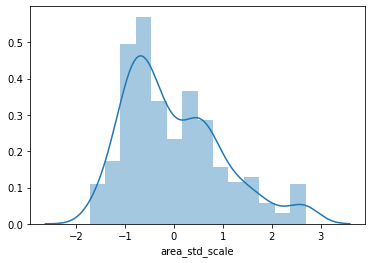

In [114]:
sns.distplot(Housing['area_std_scale'])

## sklearn MinMaxScaler Method

In [37]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
norm_scale = MinMaxScaler()
norm_scale

MinMaxScaler()

In [38]:
Housing['area_minmax_scale'] = norm_scale.fit_transform(Housing[['area']])

In [39]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area,area_std_scale,area_minmax_scale
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,8.911934,1.156583,0.651977
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,9.100526,1.925060,0.825989
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9.206332,2.424072,0.938983
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8.922658,1.196504,0.661017
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8.911934,1.156583,0.651977


In [112]:
print(Housing['area_minmax_scale'].mean())
print(Housing['area_minmax_scale'].std())

0.3900846939304415
0.22664455967628636


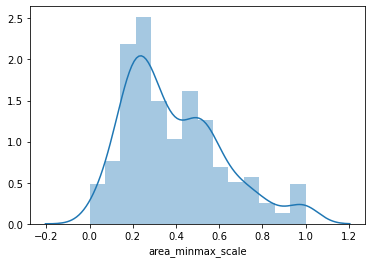

In [113]:
sns.distplot(Housing['area_minmax_scale'])

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=Feature%20scaling%20is%20essential%20for,that%20calculate%20distances%20between%20data.&text=Therefore%2C%20the%20range%20of%20all,proportionately%20to%20the%20final%20distance.

### Why do we need scaling?

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model

The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same

Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it

This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian

### When do we need Scaling?

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances, as explained intuitively in the “why?” section.
The ML algorithm is sensitive to the “relative scales of features,” which usually happens when it uses the numeric values of the features rather than say their rank.
In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization

In [98]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(Housing_1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Dividing into X and Y sets for the model building

In [99]:
y_train = df_train.pop('price')
X_train = df_train

In [100]:
X_train.shape

(381, 13)

In [61]:
X_train.head()

,bedrooms,bathrooms,stories,parking,log_area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,3,1,1,1,8.188689,1,0,0,0,0,0,0,1
19,3,2,2,1,8.767173,1,0,0,0,1,1,1,0
159,3,2,1,0,8.055158,1,1,1,0,1,0,0,0
35,3,2,4,2,8.853665,1,0,0,0,1,0,0,0
28,5,2,2,2,8.980927,1,0,1,1,0,0,0,1


In [102]:
# Test Data
y_test = df_test.pop('price')
X_test = df_test 

In [101]:
X_test.shape

(164, 13)

In [64]:
X_test.head()

,bedrooms,bathrooms,stories,parking,log_area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
265,3,1,2,0,7.965546,1,0,0,0,0,1,1,0
54,3,2,2,1,8.699515,1,1,0,0,1,0,1,0
171,3,1,1,1,9.236885,1,0,0,0,0,1,1,0
244,3,1,2,0,8.579229,1,1,1,0,0,1,1,0
268,4,1,2,0,8.507143,1,0,0,0,1,0,1,0


# Step 5: Feature Selection Techniques
* **Recursive Feature Elimination (RFE)** -
  Implementing the Recursive Feature Elimination method of feature ranking via the use of basic Linear Regression

Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

RFE works by searching for a subset of features by starting with all features in the dataset and successfully removing features until the desired number remains.

When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least.At each stage of the search, the least important predictors are iteratively eliminated prior to rebuilding the model.

— Pages 494-495, Applied Predictive Modeling, 2013.

Features are scored either using the provided machine learning model (e.g. some algorithms like decision trees offer importance scores) or by using a statistical method.

The importance calculations can be model based (e.g., the random forest importance criterion) or using a more general approach that is independent of the full model.

In [65]:
import sklearn
print(sklearn.__version__)

0.23.1


In [81]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [82]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 10,verbose=True)   # running RFE
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


In [83]:
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True  True  True  True  True  True  True False
  True]
[3 1 1 2 1 1 1 1 1 1 1 4 1]


In [84]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Support':rfe.support_,
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Support,Ranking
1,bathrooms,True,1
2,stories,True,1
4,log_area,True,1
5,mainroad_yes,True,1
6,guestroom_yes,True,1
7,basement_yes,True,1
8,hotwaterheating_yes,True,1
9,airconditioning_yes,True,1
10,prefarea_yes,True,1
12,furnishingstatus_unfurnished,True,1


In [85]:
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'stories', 'log_area', 'mainroad_yes', 'guestroom_yes',
       'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes',
       'prefarea_yes', 'furnishingstatus_unfurnished'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'parking', 'furnishingstatus_semi-furnished'], dtype='object')

# Step 6: Base Model Building model using statsmodel

In [106]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [107]:
X_train_rfe.shape

(381, 10)

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X_train_rfe = sm.add_constant(X_train_rfe)

In [109]:
X_train_rfe.shape

(381, 11)

In [90]:
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [91]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     75.76
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           3.10e-83
Time:                        23:23:50   Log-Likelihood:                -5819.8
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     370   BIC:                         1.170e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

guestroom_yes is insignificant in presence of other variables; can be dropped -Try rebuilding your model without guestroom_yes

In [110]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)
ypred_test = lm.predict(X_test_rfe)

In [117]:
# Traning Predict
ypred_train = lm.predict(X_train_rfe)
print(ypred_test[0:5])
print(ypred_test.shape,y_test.shape)

265    4.101064e+06
54     6.639959e+06
171    5.627765e+06
244    5.563336e+06
268    5.006198e+06
dtype: float64
(164,) (164,)


### Interpretation of the Model

### Write Theory Here??

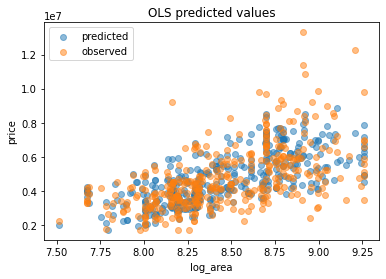

In [120]:
# df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])
# Plot predicted values
x = X_train['log_area']
fix, ax = plt.subplots()
ax.scatter(x, ypred_train, alpha=0.5,
        label='predicted')

# Plot observed values
ax.scatter(x, y_train, alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('log_area')
ax.set_ylabel('price')
plt.show()

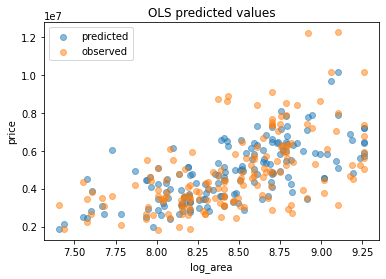

In [122]:
# Plot predicted values
x_test = X_test['log_area']
fix, ax = plt.subplots()
ax.scatter(x_test, ypred_test, alpha=0.5,label='predicted')

# Plot observed values
ax.scatter(x_test, y_test, alpha=0.5,label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('log_area')
ax.set_ylabel('price')
plt.show()

Text(0, 0.5, 'ypred')

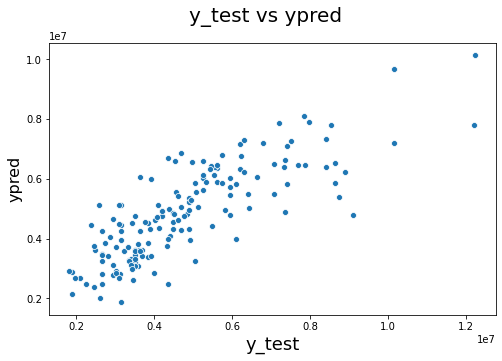

In [123]:
fig = plt.figure(figsize=(8,5))
sns.scatterplot(y_test,ypred_test)
fig.suptitle('y_test vs ypred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ypred', fontsize=16)     

In [124]:
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
# https://www.kaggle.com/getting-started/116531
# https://machinelearningmastery.com/rfe-feature-selection-in-python/

* **Other Feature importance Techniques for a Linear Regression model for beginers**
    * Numerical Variables 
        * Correlation between X-variable and Y-variable
        * Sklearn
            * RFE
            * RFECV - X- validation
    * Categorical Variables
        * ANOVA Test
        * Box-Plots

## Accuracy of the Model

In [125]:
from sklearn import metrics

In [127]:
print(metrics.mean_absolute_error(y_test,ypred_test))
print(metrics.mean_squared_error(y_test,ypred_test))
print(metrics.mean_squared_log_error(y_test,ypred_test))

850544.545719507
1360073082877.2654
0.055767752576049844


In [128]:
def rmse(x,y):
    return np.sqrt(np.mean((x-y)**2))

In [130]:
print("Train_data", rmse(y_train, ypred_train))
print("Test_data", rmse(y_test,ypred_test))

Train_data 1041365.6751933945
Test_data 1166221.7125732417


# Step 7: Regression Model Assumptions Validation

## 1) Linearity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

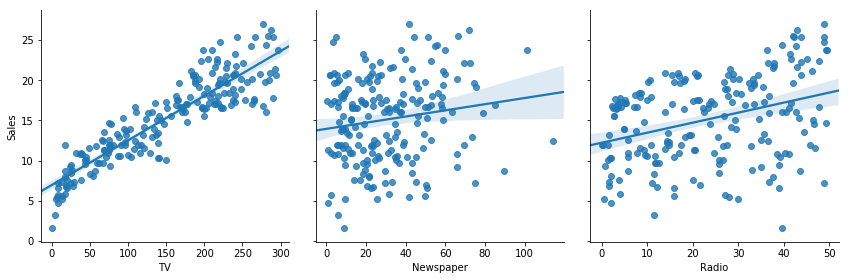

In [18]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='reg');
plt.show();

From above it shows that newspapers do not have a linear relationship with sales - infact almost no relationship. But when we have more predictors then modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals).Ideally, the points should lie on or around a diagonal line on the scatter plot.

**What it will affect**: The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

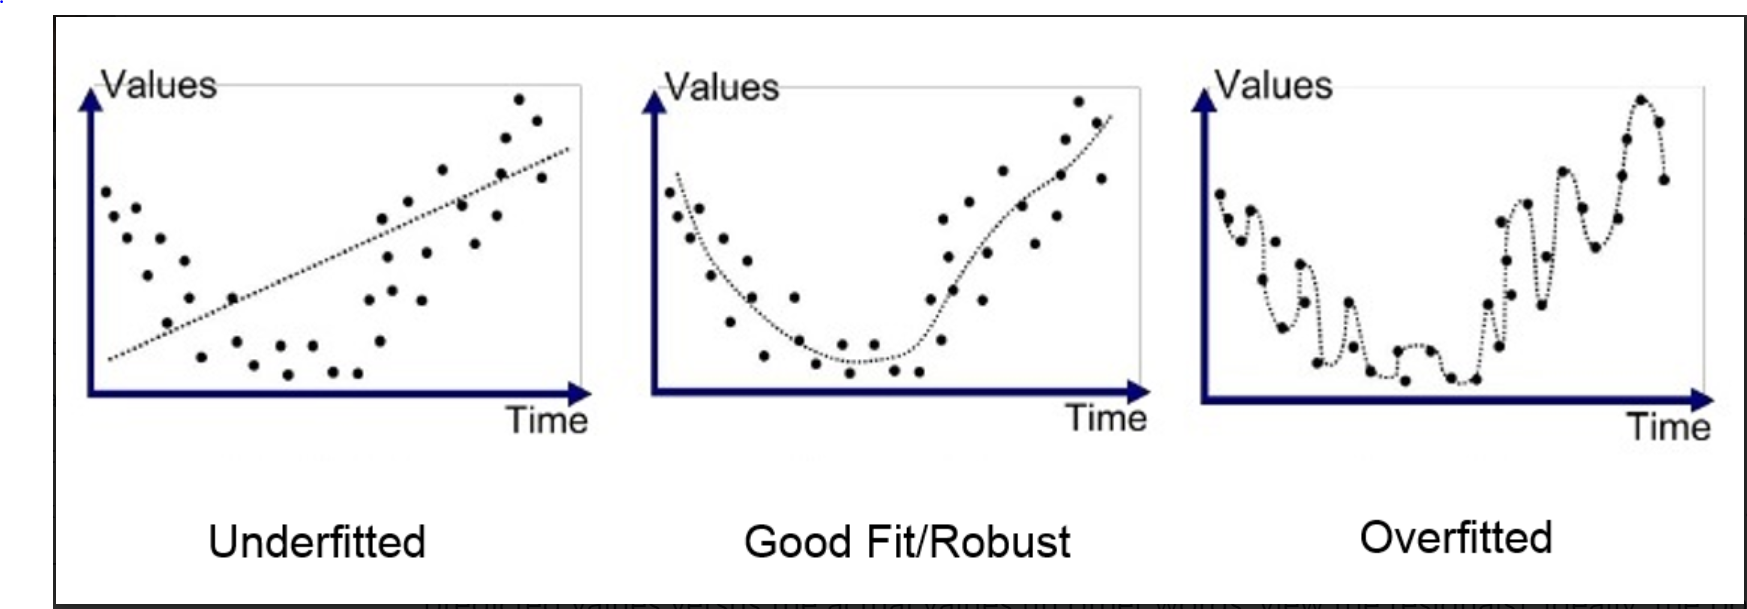

In [32]:
Image("image.png")

* **Assumption 1**: Linear Relationship between the Target and the Feature. If there is only one predictor, this is pretty easy to test with a scatter plot. But if there are more than one independent features
* **Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line**

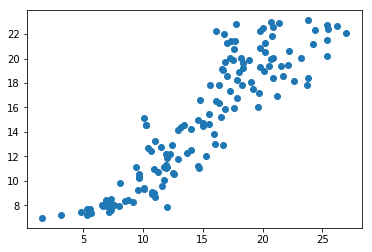

In [36]:
# Train Data
plt.scatter(y_train, y_train_pred) # Assumptions should be verified on training dataset 

### What if we do not find a linear relationship between actual v/s predicted
* **How to fix it**: Either adding polynomial terms to some of the predictors or applying nonlinear transformations . If those do not work, try adding additional variables to help capture the relationship between the predictors and the label. - **Data Transformations** like - Log transformations, polynomial Regression etc

If not the above, then we should not use a linear regression model - other non-linear model should be tried like - Decision Trees, RF etc.

**Rule of thumb** - If Y is a continuous variable, try linear regression first, if the accuracy like- RMSE, MSE, MAE are not coming good in LR even after data transformations but better in DT, RF etc. then stick to other non-linear technqiues

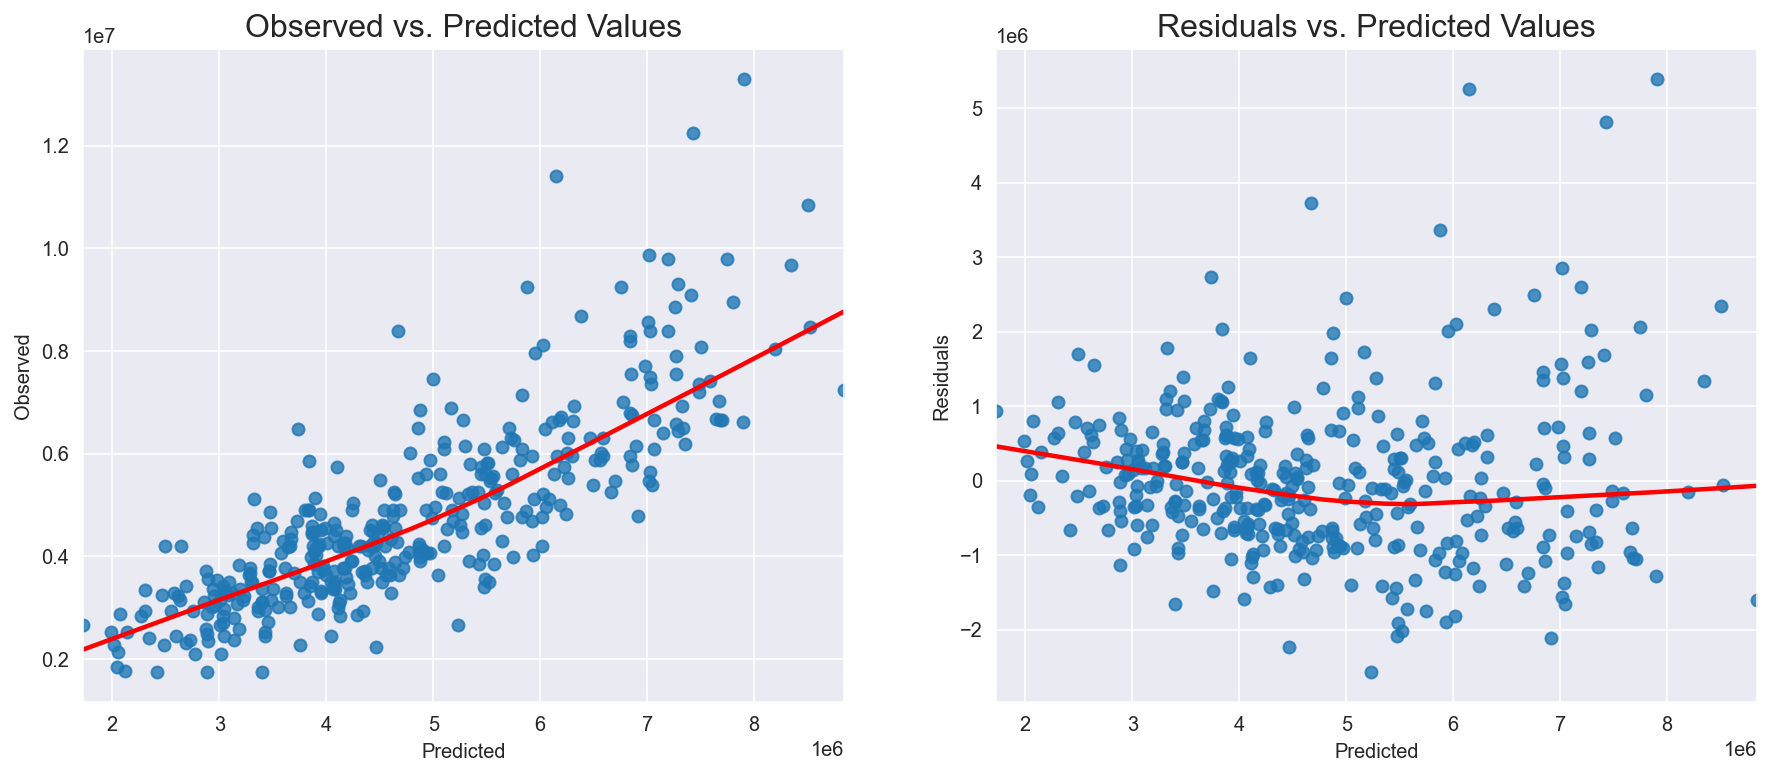

In [227]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 6.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lm, y_train)    

**Potential solutions:**
* non-linear transformations to dependent/independent variables
* adding extra features which are a transformation of the already used ones (for example squared version)
* adding features that were not considered before

## 2) Normality of the Error Terms

In [228]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

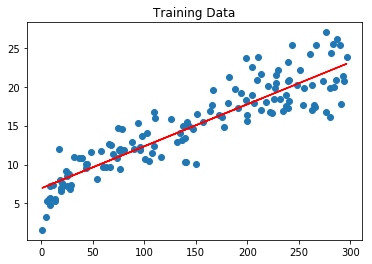

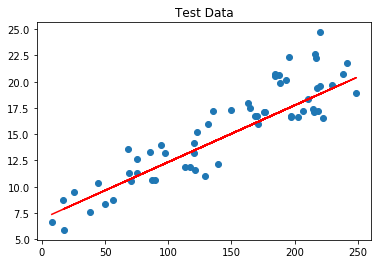

In [48]:
# X_train (single independent variable) v/s Y variable
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.title('Training Data')
plt.show();

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.title('Test Data')
plt.show();

In [44]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

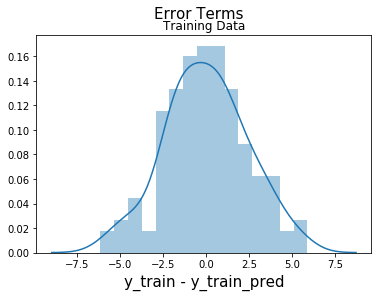

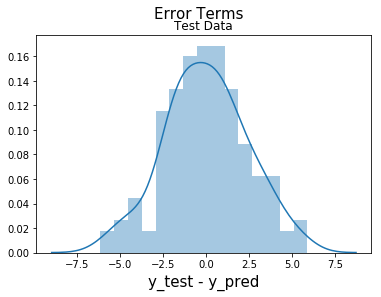

In [50]:
# Training Data
fig = plt.figure()
sns.distplot(res, bins = 15) # histogram of error terms
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.title('Training Data')
plt.show();


# Test Data
fig = plt.figure()
sns.distplot(res, bins = 15) # histogram of error terms
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_pred', fontsize = 15)         # X-label
plt.title('Test Data')
plt.show();

* More specifically, this assumes that the error terms of the model are normally distributed.Error terms should follow normal distribution with a mean of 0 and constant variance.

* **Why do we need normality assumption**:
Because of confidence intervals around the estimators (check your confidence Interval lecture)
https://stats.stackexchange.com/questions/152674/why-is-the-normality-of-residuals-barely-important-at-all-for-the-purpose-of-e
https://stats.stackexchange.com/questions/120776/why-should-we-use-t-errors-instead-of-normal-errors/120787#120787
https://stats.stackexchange.com/questions/148803/how-does-linear-regression-use-the-normal-distribution

* **What it will affect**: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals. (Intution should be explained)

* **How to detect it**: There are a variety of ways to do so, but we’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.

    * The Shapiro-Wilk test
    * The Anderson-Darling test
    * The Kolmogorov-Smirnov test

* As well, there are some visual measures to be implemented:
    * Box Plots
    * QQ Plots

https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/

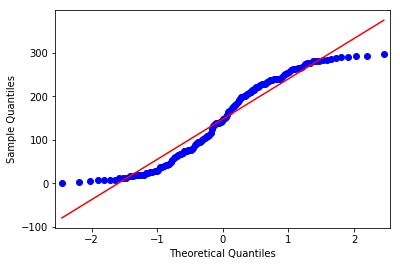

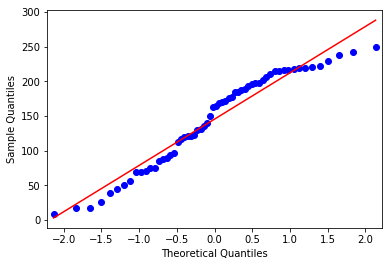

In [57]:
from statsmodels.graphics.gofplots import qqplot
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

# q-q plot - Train Data
qqplot(X_train, line='s')
plt.show();

# q-q plot - Test Data
qqplot(X_test, line='s')
plt.show();

# pyplot.show()

https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0#:~:text=If%20the%20bottom%20end%20of,line%20and%20the%20lower%20and

In [39]:
# from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import anderson
# Performing the test on the residuals
df_results = anderson(X_train)
print(df_results)

AndersonResult(statistic=2.851029525395063, critical_values=array([0.561, 0.639, 0.766, 0.894, 1.063]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


* Hypothesis setting
    * H0: Data are normally distributed
        * p <= alpha: reject H0, not normal.
    * H1: Data are not normally distributed
        * p > alpha: fail to reject H0, normal.

In [231]:
from scipy.stats import anderson

df_results = anderson(X_train)
print(df_results)

ValueError: Length of passed values is 381, index implies 13.

In [40]:
for i in range(len(df_results.critical_values)):
    sl, cv = df_results.significance_level[i], df_results.critical_values[i]
    if df_results.statistic < df_results.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.894, data does not look normal (reject H0)
1.000: 1.063, data does not look normal (reject H0)


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

## 3) No Multicollinearity among Predictors - 
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

* **Why it can happen:** A lot of data is just naturally correlated. For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.

* **What it will affect:** Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, ***it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant***.

* **How to detect it:** There are a few ways, but we will use a ***heatmap of the correlation*** as a visual aid and examine the ***variance inflation factor (VIF)***

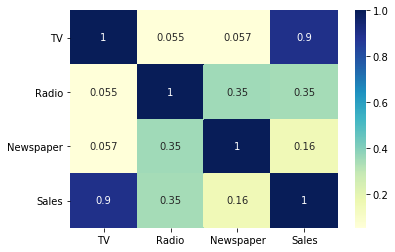

In [9]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

* **How to fix it:** This can be fixed by other removing predictors with a high ***variance inflation factor (VIF)*** or performing dimensionality reduction.
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

***VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.***

**or**

***VIF score of an independent variable represents how well the variable is explained by other independent variables.***

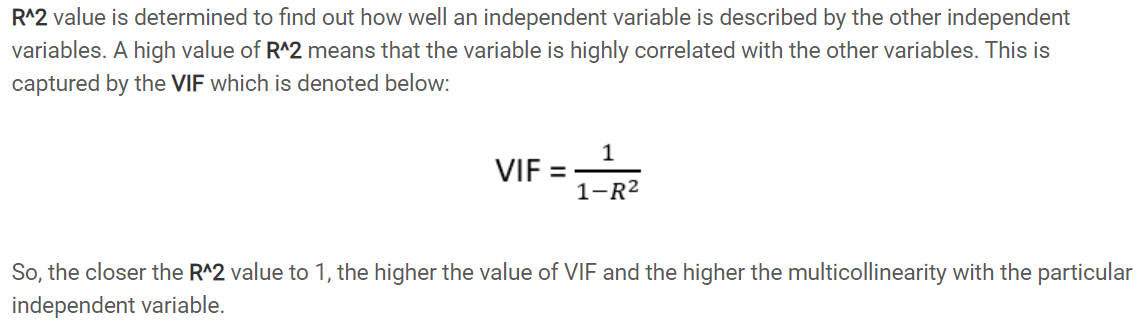

In [11]:
Image("VIF_Image.png")

In [12]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
# VIF function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [14]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
X = advertising.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


Though here we do not observe any multicolinearity or strong relationship among independent variables. let's pick another example on the same

In [41]:
bmi_data = pd.read_csv('BMI_vif.csv')
bmi_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [42]:
# creating dummies for gender 
bmi_data['Gender'] = bmi_data['Gender'].map({'Male':0, 'Female':1}) 
  
# the independent variables set 
X = bmi_data[['Gender', 'Height', 'Weight']] 
X.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [43]:
calc_vif(X)

,variables,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377


As we can see, height and weight have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the height of a person does influence their weight. Hence, considering these two features together leads to a model with high multicollinearity

## ***VIF goes above 5, you can assume that the regression coefficients are poorly estimated due to multicollinearity.***

* **Fixing Multicollinearity:** Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features

In [44]:
X = bmi_data.drop(['Height'],axis=1)
X = X.iloc[:,:-1]

In [46]:
calc_vif(X)

,variables,VIF
0,Gender,1.865292
1,Weight,1.865292


We were able to drop the variable ‘Height’ from the dataset because its information was being captured by the ‘Weight’ variable. This has reduced the redundancy in our dataset.

* **When do we need to treat Multicollinearity:** It may not be a problem every time. The need to fix multicollinearity depends primarily on the below reasons:

    * When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option

    * If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem

## 4) No Autocorrelation of the Error Terms
- This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model

- The term autocorrelation may be defined as “correlation between members of series of observations ordered in time as in time series data or space as in cross-sectional data.

- In the regression context, the classical linear regression model assumes that such autocorrelation does not exist in the disturbances ui . Symbolically,
                cov(ui , uj|xi , xj) = E(uiuj) = 0 i = j
                
- In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend

**Why it can happen**: In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption

**What it will affect**: This will impact our model estimates

**How to detect it**: We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.

**How to fix it:** A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.

**Implementation**: There should not be autocorrelation in the data so the error terms should not form any pattern.

In [157]:
residuals_test = y_test - ypred_test
residuals_train = y_train - ypred_train

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


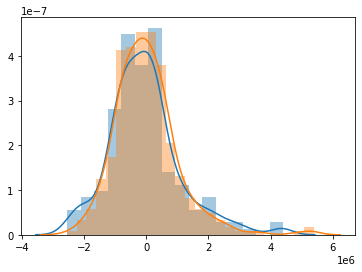

In [158]:
print(sns.distplot(residuals_test))
print(sns.distplot(residuals_train))

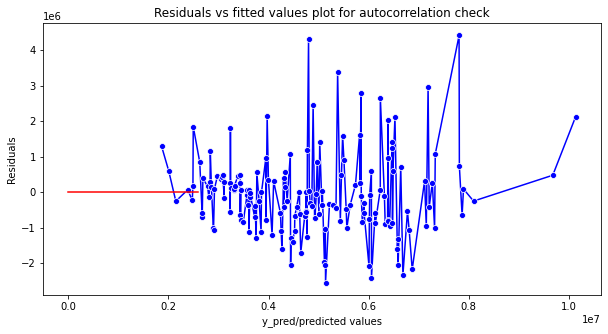

In [204]:
# ResidualPlots on test data
plt.figure(figsize=(10,5))
p = sns.lineplot(ypred_test,residuals_test,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-2,5000000)
# plt.xlim(0,100000)
p = sns.lineplot([0,2600000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

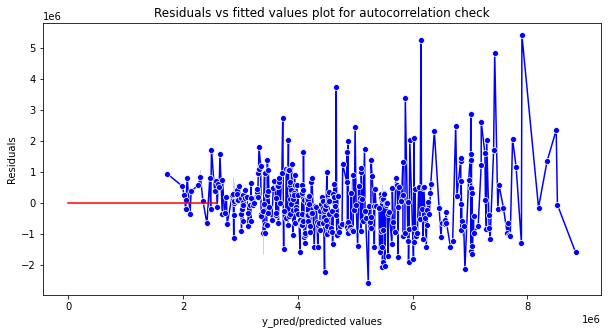

In [199]:
# ResidualPlots on training data
plt.figure(figsize=(10,5))
p = sns.lineplot(ypred_train,residuals_train,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
# plt.ylim(-2,5000000)
# plt.xlim(0,100000)
p = sns.lineplot([0,2600000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

- One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression. This test uses the following hypotheses:
    * H0 (null hypothesis): There is no correlation among the residuals.

    * HA (alternative hypothesis): The residuals are autocorrelated.

The test statistic is approximately equal to 2*(1-r).where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation

In [201]:
from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test
durbin_watson(lm.resid)

2.1106939441181853

* Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
* A test statistic of 2 indicates no serial correlation
* The closer the test statistics is to 0, the more evidence of positive serial correlation
* The closer the test statistics is to 4, the more evidence of negative serial correlation

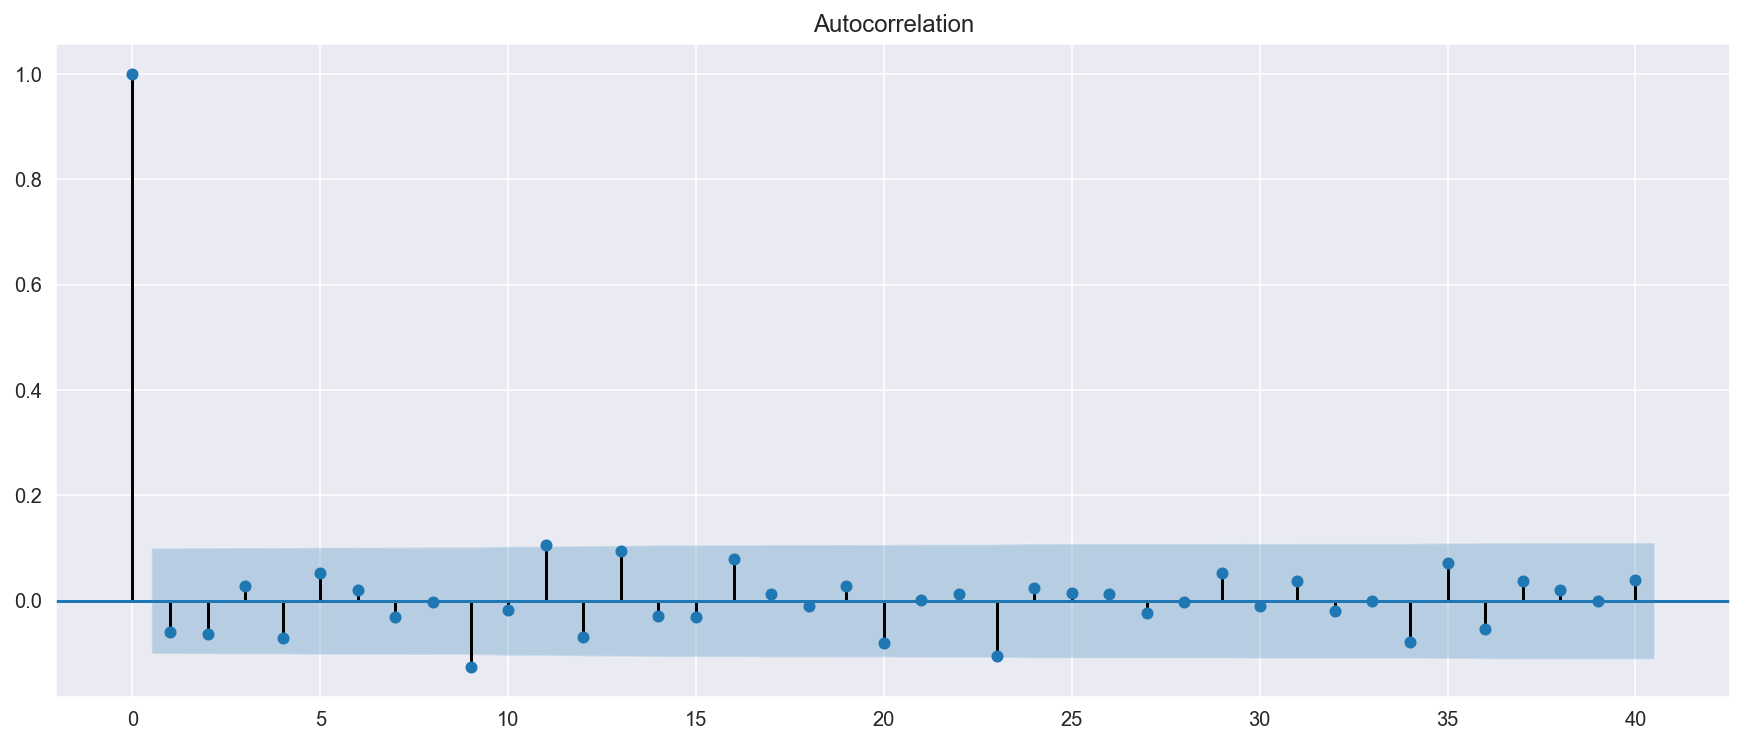

In [223]:
# autocorrelation
sm.graphics.tsa.plot_acf(lm.resid, lags=40)
plt.show()

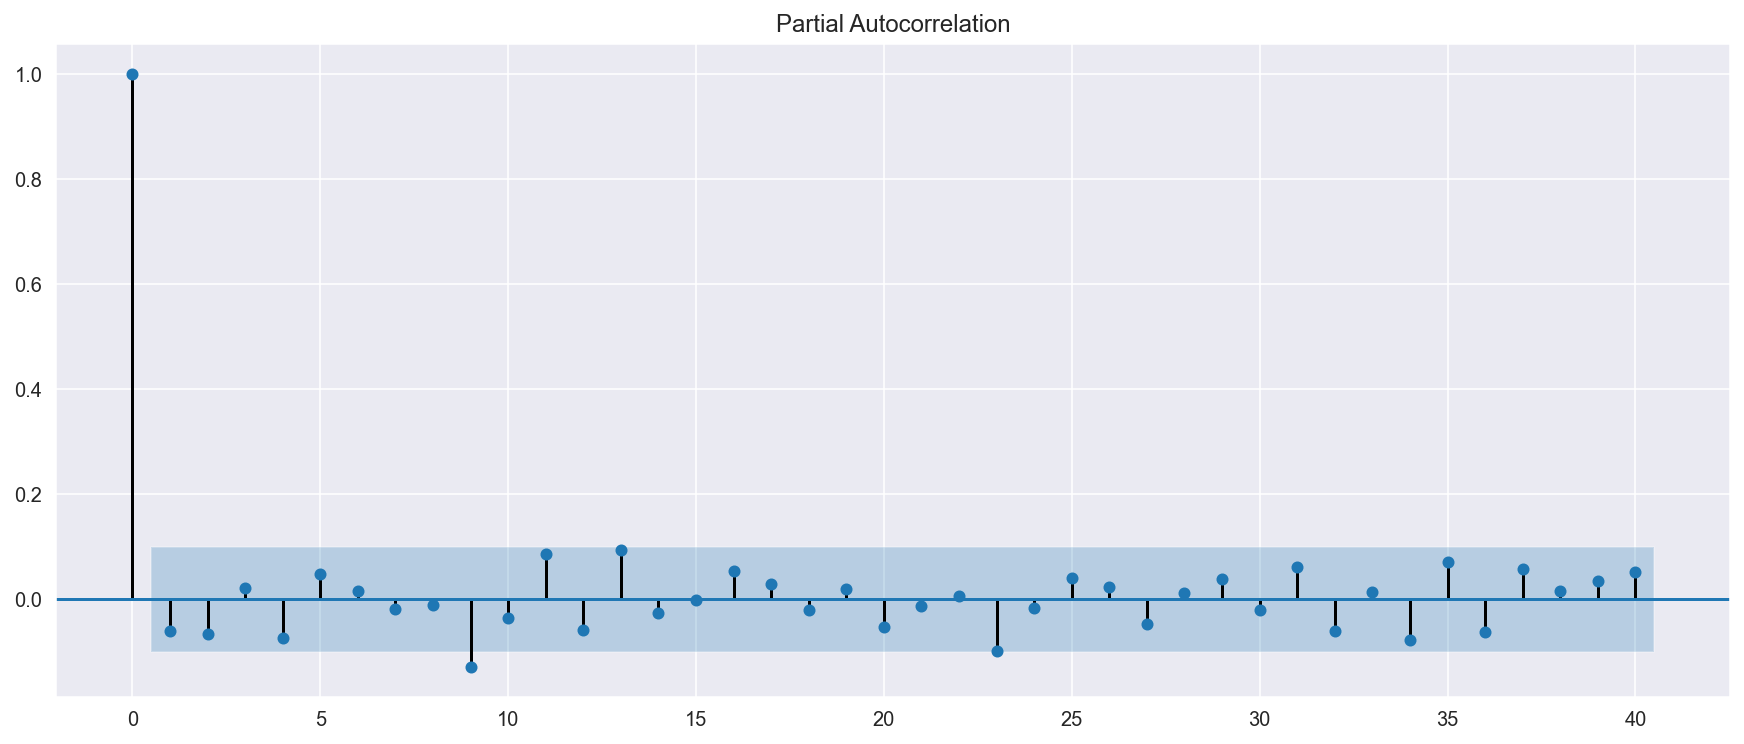

In [224]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(lm.resid, lags=40)
plt.show()

The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

## 5) Homoscedasticity

This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms

**Why it can happen**: Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest

**How to detect it**: Plot the residuals and see if the variance appears to be uniform.

**How to fix it**: Heteroscedasticity (can you tell I like the scedasticity words?) can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start

**What it will affect**: Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow

When residuals do not have constant variance (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. For example, if the variance of the residuals is increasing over time, confidence intervals for out-of-sample predictions will be unrealistically narrow. Another effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients — the subset in which the error variance was largest. To investigate if the residuals are homoscedastic, we can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. What should alarm us is the case when the residuals grow either as a function of predicted value or time (in case of time series). We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them, the null hypothesis assumes homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  29.368613
p-value                         0.001086
f-value                         3.090278
f p-value                       0.000857

 Goldfeld-Quandt test ----
                value
F statistic  1.631134
p-value      0.000561

 Residuals plots ----


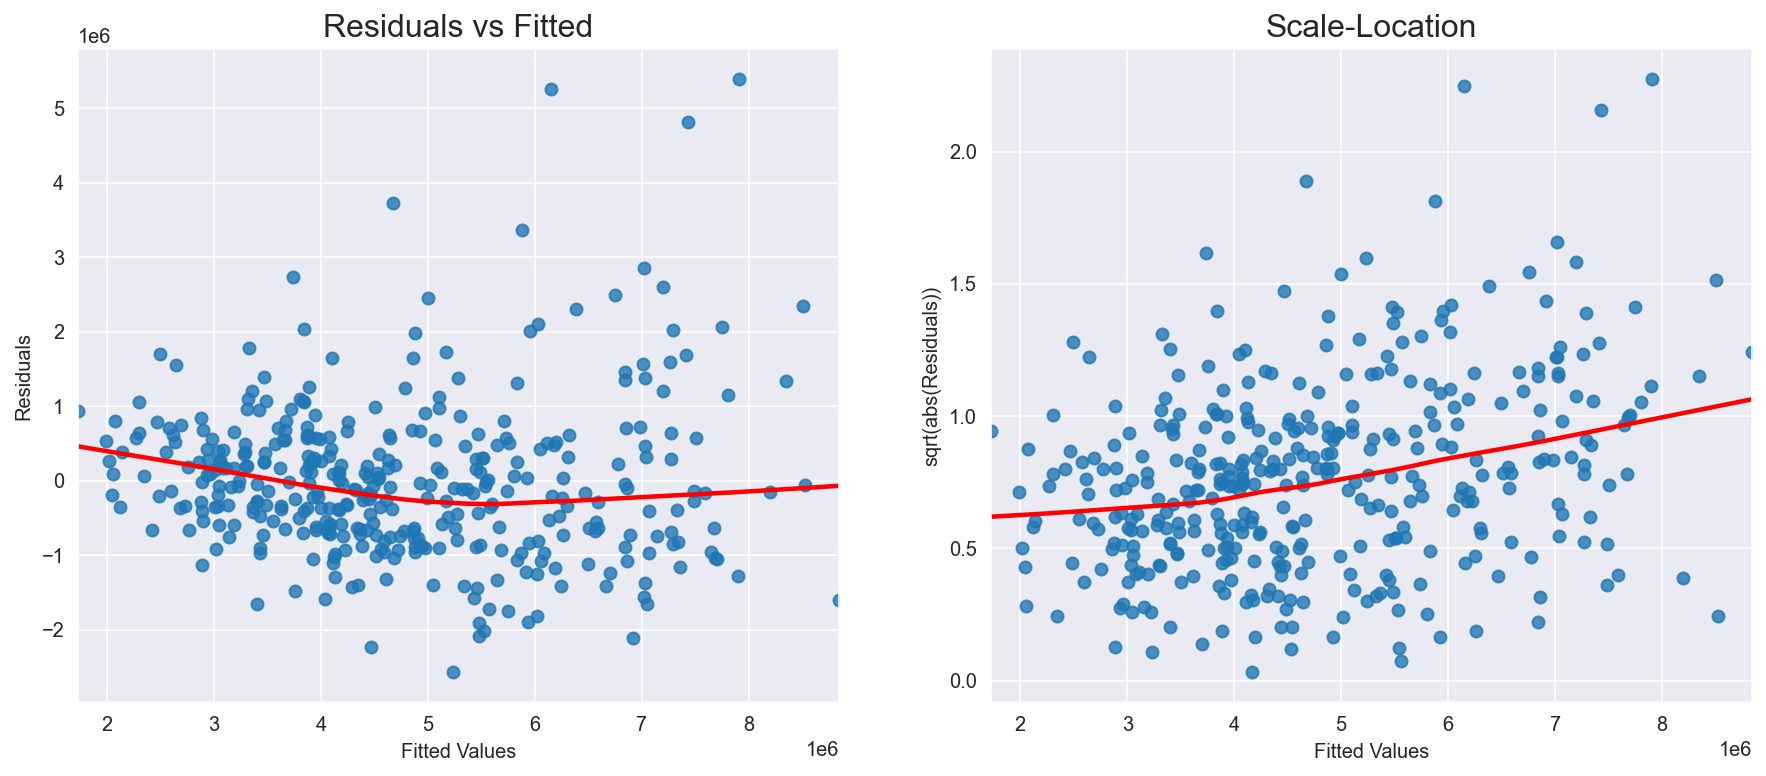

In [222]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 6.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lm)

https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

* ***The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity.***

* **Potential solutions:**
    * log transformation of the dependent variable
    * In case of time series, deflating a series if it concerns monetary value
    * Using ARCH (auto-regressive conditional heteroscedasticity) models to model the error variance. An example might be stock market, where data can exhibit periods of increased or decreased volatility over time (volatility clustering, see this article for more information)

* https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

* https://github.com/erykml/medium_articles/tree/master/Statistics